In [1]:
from sharpness.spec_slope import *
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial as P

## White noise test

In [2]:
wn_array = np.random.uniform(0, 1, (128, 128))

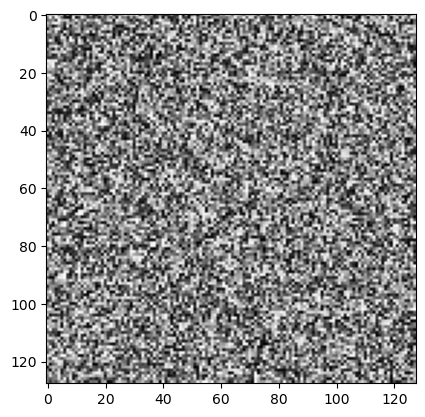

In [3]:
plt.imshow(wn_array, cmap='gray')

In [4]:
spec_slope(wn_array, hanning=False)

(0.016462973026190937, 3.502016814132996)

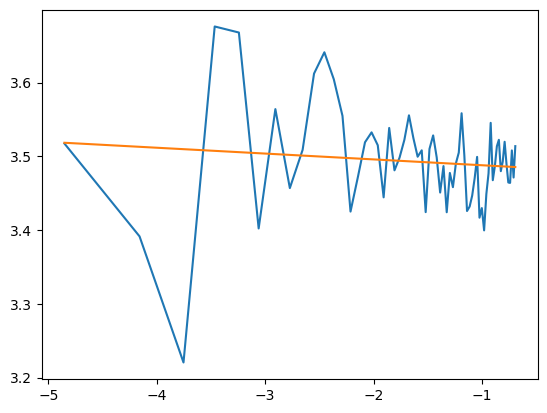

In [5]:
f, s = polar_average(np.abs(np.fft.fft2(wn_array)))
line = P.fit(np.log(f), np.log(s), 1)
plt.plot(np.log(f), np.log(s))
plt.plot(np.log(f), line(np.log(f)))

## Pink noise test

In [23]:
ft_arr = np.fft.fftshift(np.fft.fft2(wn_array))
_x, _y = np.mgrid[0:ft_arr.shape[0], 0:ft_arr.shape[1]]
f = np.hypot(_x - ft_arr.shape[0] / 2, _y - ft_arr.shape[1] / 2)
pink_ft_arr = ft_arr / f
pink_ft_arr = np.nan_to_num(pink_ft_arr, nan=0, posinf=0, neginf=0)

pn_array = np.fft.ifft2(np.fft.ifftshift(pink_ft_arr)).real

/tmp/ipykernel_2021980/2717435843.py:4: RuntimeWarning: divide by zero encountered in divide
  pink_ft_arr = ft_arr / f
/tmp/ipykernel_2021980/2717435843.py:4: RuntimeWarning: invalid value encountered in divide
  pink_ft_arr = ft_arr / f


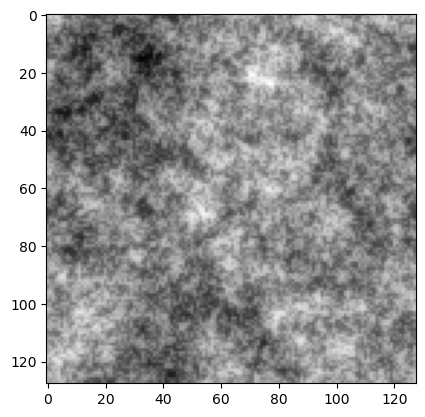

In [24]:
plt.imshow(pn_array, cmap='gray')

In [25]:
spec_slope(pn_array, hanning=False)

(2.0846248165497157, 1.415403712425387)

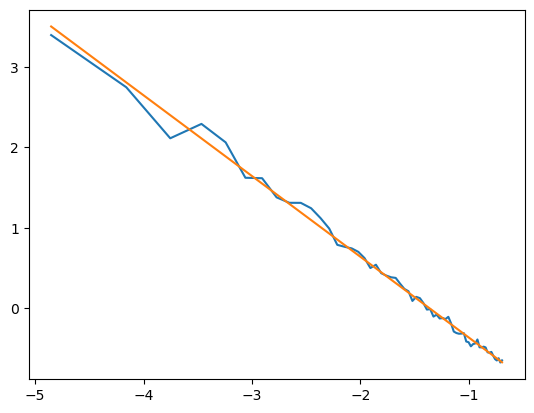

In [26]:
f, s = polar_average(np.abs(np.fft.fft2(pn_array)))
line = P.fit(np.log(f), np.log(s), 1)
plt.plot(np.log(f), np.log(s))
plt.plot(np.log(f), line(np.log(f)))

In [27]:
s1(pn_array, contrast_threshold=0)

0.42774258400477094

In [28]:
s1(wn_array, contrast_threshold=0)

0.9728458599095364